# **1. Setting datasets and environments for training**

Before starting the head masking and testing, it needs to set datasets and traning model.

This time, I used cifar10 for the dataset and used ViTForImageClassification as a model. ViTForImageClassification has been trained with imageNet, so I fintuned it on cifar10.

In [ ]:
! pip install datasets transformers

In [ ]:
from datasets import load_dataset

ds = load_dataset('cifar10')
ds

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})

In [ ]:
ex = ds['train'][400]
ex

{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 'label': 0}

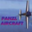

In [ ]:
image = ex['img']
image

In [ ]:
print(image)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32 at 0x785DD0022620>


In [ ]:
labels = ds['train'].features['label']
labels

ClassLabel(names=['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'], id=None)

## Loading ViT Feature Extractor



In [ ]:
from transformers import ViTFeatureExtractor

model_name_or_path = 'google/vit-base-patch16-224-in21k'
feature_extractor = ViTFeatureExtractor.from_pretrained(model_name_or_path)

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(


In [ ]:
feature_extractor

ViTFeatureExtractor {
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "image_mean": [
    0.5,
    0.5,
    0.5
  ],
  "image_processor_type": "ViTFeatureExtractor",
  "image_std": [
    0.5,
    0.5,
    0.5
  ],
  "resample": 2,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "height": 224,
    "width": 224
  }
}

In [ ]:
feature_extractor(image, return_tensors='pt')

{'pixel_values': tensor([[[[ 0.0588,  0.0588,  0.0588,  ...,  0.0824,  0.0824,  0.0824],
          [ 0.0588,  0.0588,  0.0588,  ...,  0.0824,  0.0824,  0.0824],
          [ 0.0588,  0.0588,  0.0588,  ...,  0.0824,  0.0824,  0.0824],
          ...,
          [-0.3882, -0.3882, -0.3882,  ..., -0.4196, -0.4196, -0.4196],
          [-0.3882, -0.3882, -0.3882,  ..., -0.4196, -0.4196, -0.4196],
          [-0.3882, -0.3882, -0.3882,  ..., -0.4196, -0.4196, -0.4196]],

         [[ 0.2784,  0.2784,  0.2784,  ...,  0.2627,  0.2627,  0.2627],
          [ 0.2784,  0.2784,  0.2784,  ...,  0.2627,  0.2627,  0.2627],
          [ 0.2784,  0.2784,  0.2784,  ...,  0.2627,  0.2627,  0.2627],
          ...,
          [-0.2784, -0.2784, -0.2784,  ..., -0.3255, -0.3255, -0.3255],
          [-0.2784, -0.2784, -0.2784,  ..., -0.3255, -0.3255, -0.3255],
          [-0.2784, -0.2784, -0.2784,  ..., -0.3255, -0.3255, -0.3255]],

         [[ 0.6471,  0.6471,  0.6471,  ...,  0.6471,  0.6471,  0.6471],
          [ 0

## Processing the Dataset


In [ ]:
def process_example(example):
    inputs = feature_extractor(example['img'], return_tensors='pt')
    inputs['labels'] = example['label']
    return inputs

In [ ]:
process_example(ds['train'][0])

{'pixel_values': tensor([[[[ 0.3961,  0.3961,  0.3961,  ...,  0.2941,  0.2941,  0.2941],
          [ 0.3961,  0.3961,  0.3961,  ...,  0.2941,  0.2941,  0.2941],
          [ 0.3961,  0.3961,  0.3961,  ...,  0.2941,  0.2941,  0.2941],
          ...,
          [-0.1922, -0.1922, -0.1922,  ..., -0.2863, -0.2863, -0.2863],
          [-0.1922, -0.1922, -0.1922,  ..., -0.2863, -0.2863, -0.2863],
          [-0.1922, -0.1922, -0.1922,  ..., -0.2863, -0.2863, -0.2863]],

         [[ 0.3804,  0.3804,  0.3804,  ...,  0.2784,  0.2784,  0.2784],
          [ 0.3804,  0.3804,  0.3804,  ...,  0.2784,  0.2784,  0.2784],
          [ 0.3804,  0.3804,  0.3804,  ...,  0.2784,  0.2784,  0.2784],
          ...,
          [-0.2471, -0.2471, -0.2471,  ..., -0.3412, -0.3412, -0.3412],
          [-0.2471, -0.2471, -0.2471,  ..., -0.3412, -0.3412, -0.3412],
          [-0.2471, -0.2471, -0.2471,  ..., -0.3412, -0.3412, -0.3412]],

         [[ 0.4824,  0.4824,  0.4824,  ...,  0.3647,  0.3647,  0.3647],
          [ 0

In [ ]:
ds = load_dataset('cifar10')

def transform(example_batch):
    # Take a list of PIL images and turn them to pixel values
    inputs = feature_extractor([x for x in example_batch['img']], return_tensors='pt')

    # Don't forget to include the labels!
    inputs['labels'] = example_batch['label']
    return inputs

prepared_ds = ds.with_transform(transform)

In [ ]:
prepared_ds['train'][0:2]

{'pixel_values': tensor([[[[ 0.3961,  0.3961,  0.3961,  ...,  0.2941,  0.2941,  0.2941],
          [ 0.3961,  0.3961,  0.3961,  ...,  0.2941,  0.2941,  0.2941],
          [ 0.3961,  0.3961,  0.3961,  ...,  0.2941,  0.2941,  0.2941],
          ...,
          [-0.1922, -0.1922, -0.1922,  ..., -0.2863, -0.2863, -0.2863],
          [-0.1922, -0.1922, -0.1922,  ..., -0.2863, -0.2863, -0.2863],
          [-0.1922, -0.1922, -0.1922,  ..., -0.2863, -0.2863, -0.2863]],

         [[ 0.3804,  0.3804,  0.3804,  ...,  0.2784,  0.2784,  0.2784],
          [ 0.3804,  0.3804,  0.3804,  ...,  0.2784,  0.2784,  0.2784],
          [ 0.3804,  0.3804,  0.3804,  ...,  0.2784,  0.2784,  0.2784],
          ...,
          [-0.2471, -0.2471, -0.2471,  ..., -0.3412, -0.3412, -0.3412],
          [-0.2471, -0.2471, -0.2471,  ..., -0.3412, -0.3412, -0.3412],
          [-0.2471, -0.2471, -0.2471,  ..., -0.3412, -0.3412, -0.3412]],

         [[ 0.4824,  0.4824,  0.4824,  ...,  0.3647,  0.3647,  0.3647],
          [ 0

# **2. Training and Evaluation**

In [ ]:
import torch

def collate_fn(batch):
    return {
        'pixel_values': torch.stack([x['pixel_values'] for x in batch]),
        'labels': torch.tensor([x['labels'] for x in batch])
    }

In [ ]:
import numpy as np
from datasets import load_metric

metric = load_metric("accuracy")
def compute_metrics(p):
    return metric.compute(predictions=np.argmax(p.predictions, axis=1), references=p.label_ids)

<ipython-input-17-3044fb6e3895>:4: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  metric = load_metric("accuracy")


In [ ]:
from transformers import ViTForImageClassification

labels = ds['train'].features['label'].names

model = ViTForImageClassification.from_pretrained(
    model_name_or_path,
    num_labels=len(labels),
    id2label={str(i): c for i, c in enumerate(labels)},
    label2id={c: str(i) for i, c in enumerate(labels)},
)

Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
pip install accelerate -U

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
  output_dir="./vit-base-cifar10",
  per_device_train_batch_size=16,
  evaluation_strategy="steps",
  num_train_epochs=2,
  fp16=True,
  save_steps=1000,
  eval_steps=1000,
  logging_steps=10,
  learning_rate=2e-4,
  save_total_limit=2,
  remove_unused_columns=False,
  push_to_hub=False,
  report_to='tensorboard',
  load_best_model_at_end=True,
)

In [ ]:
prepared_ds

DatasetDict({
    train: Dataset({
        features: ['img', 'label'],
        num_rows: 50000
    })
    test: Dataset({
        features: ['img', 'label'],
        num_rows: 10000
    })
})

In [ ]:
 new = prepared_ds["train"].shuffle(seed=42).select(range(2))
 new

Dataset({
    features: ['img', 'label'],
    num_rows: 2
})

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    data_collator=collate_fn,
    compute_metrics=compute_metrics,
    train_dataset=prepared_ds["train"],
    eval_dataset=prepared_ds["test"],
    tokenizer=feature_extractor,
)

In [ ]:
train_results = trainer.train()
trainer.save_model()
trainer.log_metrics("train", train_results.metrics)
trainer.save_metrics("train", train_results.metrics)
trainer.save_state()

Step,Training Loss,Validation Loss,Accuracy
1000,0.191300,0.229847,0.933200
2000,0.125300,0.191412,0.941600
3000,0.153100,0.125063,0.962300
4000,0.020300,0.106399,0.968500
5000,0.026500,0.118561,0.970200
6000,0.002700,0.086748,0.976300


***** train metrics *****
  epoch                    =          2.0
  total_flos               = 7217521397GF
  train_loss               =       0.1527
  train_runtime            =   0:41:12.13
  train_samples_per_second =       40.451
  train_steps_per_second   =        2.528


In [ ]:
classes = [
    'airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'
]

In [ ]:

def test(model, mask) :
  #correct_pred = {classname: 0 for classname in classes}
  #total_pred = {classname: 0 for classname in classes}

  correct = 0
  total = 0

  with torch.no_grad():
      for data in prepared_ds["test"].select(range(1000)):
          img = data['pixel_values']
          labels = data['labels']
          img = img.resize(1,3,224,224)
          #images = F.interpolate(img, (224,224))
          #images = torch.squeeze(images)
          outputs = model(img.to('cuda'), head_mask = mask)
          predictions = outputs.logits.argmax(dim=1)
          #print(outputs.logits)
          total += 1
          correct += predictions.item() == labels

          '''if labels == predictions.item():
              correct_pred[classes[labels]] += 1
          total_pred[classes[labels]] += 1'''

  ans = float(correct)/float(total)
  print(f'Accuracy of the network on the 10000 test images: {100 * ans} %')

  '''for classname, correct_count in correct_pred.items():
      accuracy = 100 * float(correct_count) / total_pred[classname]
      print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')'''

  return (100 * correct / total)

# **3. Head masking**

In [ ]:
shape = (12,12,)
a = torch.ones(shape)
mask_initial = torch.FloatTensor(a,)
test(model.to('cuda'), mask_initial.to('cuda'))

/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:836: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Accuracy of the network on the 10000 test images: 97.7 %


97.7

In [ ]:
shape = (12,12,)
a = torch.ones(shape)
mask_initial = torch.FloatTensor(a,)

masking = []
for k in range(10) :

  for i in range(12) :
    for l in masking :
      mask_initial[i][l]=0

  _max=0;
  max_idx=0;
  for i in range(12) :
    if(i in masking) :
      continue
    for j in range(12) :
      mask_initial[j][i]=0
    srg = test(model, mask_initial.to('cuda'))

    srg=16
    for data in prepared_ds["test"].select([16,17]):
      img = data['pixel_values']
      labels = data['labels']
      img = img.resize(1,3,224,224)
      model = model.to('cuda')
      outputs = model(img.to('cuda'), output_attentions=True)
      attention_mask(ds["test"][srg]['img'],outputs)
      predictions = outputs.logits.argmax(dim=1)
      print(predictions.item(), labels)
      srg= srg+1

    if(srg>_max) :
      _max = srg
      max_idx = i

    #print(mask_initial)
    for j in range(12) :
      mask_initial[j][i]=1
  masking.append(max_idx)
  print(max_idx, masking)


In [ ]:
shape = (12,12,)
a = torch.ones(shape)
mask_initial = torch.FloatTensor(a,)

masking = []
for k in range(10) :

  for i in range(12) :
    for l in masking :
      mask_initial[l][i]=0

  _max=100;
  max_idx=0;
  for i in range(12) :
    if(i in masking) :
      continue
    for j in range(12) :
      mask_initial[i][j]=0
    srg = test(model, mask_initial.to('cuda'))
    if(srg<_max) :
      _max = srg
      max_idx = i

    #print(mask_initial)
    for j in range(12) :
      mask_initial[i][j]=1

  masking.append(max_idx)
  print(max_idx, masking)


Accuracy of the network on the 10000 test images: 96.0 %
Accuracy of the network on the 10000 test images: 94.39999999999999 %
Accuracy of the network on the 10000 test images: 94.5 %
Accuracy of the network on the 10000 test images: 96.3 %
Accuracy of the network on the 10000 test images: 95.89999999999999 %
Accuracy of the network on the 10000 test images: 96.89999999999999 %
Accuracy of the network on the 10000 test images: 97.5 %
Accuracy of the network on the 10000 test images: 96.8 %
Accuracy of the network on the 10000 test images: 96.5 %
Accuracy of the network on the 10000 test images: 97.89999999999999 %
Accuracy of the network on the 10000 test images: 97.8 %
Accuracy of the network on the 10000 test images: 97.0 %
1 [1]
Accuracy of the network on the 10000 test images: 91.10000000000001 %
Accuracy of the network on the 10000 test images: 67.60000000000001 %
Accuracy of the network on the 10000 test images: 86.6 %
Accuracy of the network on the 10000 test images: 90.2 %
Accu

In [ ]:
shape = (12,12,)
a = torch.ones(shape)
mask_initial = torch.FloatTensor(a,)

masking = []
for k in range(10) :

  for i in range(12) :
    for l in masking :
      mask_initial[l][i]=0

  _max=0;
  max_idx=0;
  for i in range(12) :
    if(i in masking) :
      continue
    for j in range(12) :
      mask_initial[i][j]=0
    srg = test(model, mask_initial.to('cuda'))
    if(srg>_max) :
      _max = srg
      max_idx = i

    #print(mask_initial)
    for j in range(12) :
      mask_initial[i][j]=1

  masking.append(max_idx)
  print(max_idx, masking)


/usr/local/lib/python3.10/dist-packages/torch/_tensor.py:836: UserWarning: non-inplace resize is deprecated
  warnings.warn("non-inplace resize is deprecated")


Accuracy of the network on the 10000 test images: 96.0 %
Accuracy of the network on the 10000 test images: 94.39999999999999 %
Accuracy of the network on the 10000 test images: 94.5 %
Accuracy of the network on the 10000 test images: 96.3 %
Accuracy of the network on the 10000 test images: 95.89999999999999 %
Accuracy of the network on the 10000 test images: 96.89999999999999 %
Accuracy of the network on the 10000 test images: 97.5 %
Accuracy of the network on the 10000 test images: 96.8 %
Accuracy of the network on the 10000 test images: 96.5 %
Accuracy of the network on the 10000 test images: 97.89999999999999 %
Accuracy of the network on the 10000 test images: 97.8 %
Accuracy of the network on the 10000 test images: 97.0 %
9 [9]
Accuracy of the network on the 10000 test images: 95.8 %
Accuracy of the network on the 10000 test images: 93.0 %
Accuracy of the network on the 10000 test images: 94.19999999999999 %
Accuracy of the network on the 10000 test images: 95.6 %
Accuracy of the n

In [ ]:
shape = (12,12,)
a = torch.ones(shape)
mask_initial = torch.FloatTensor(a,)

import random
for k in range(10) :
  a = torch.ones(shape)
  mask_initial = torch.FloatTensor(a,)
  for i in range(12) :
    numbers = random.sample(range(0,12), k+1)
    print(numbers)
    for j in numbers :
      mask_initial[i][j]=0

  print(mask_initial)
  test(model, mask_initial.to('cuda'))


[4]
[2]
[7]
[8]
[11]
[4]
[9]
[10]
[8]
[0]
[10]
[8]
tensor([[1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.],
        [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1.]])
Accuracy of the network on the 10000 test images: 94.0 %
[4, 10]
[1, 2]
[4, 1]
[1, 8]
[2, 4]
[4, 9]
[3, 5]
[3, 10]
[10, 4]
[8, 7]
[4, 0]
[1, 10]
tensor([[1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.],
        [1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 

# **4. Extra testing**

This part was held to test if head masking has an impact on accuracy of each classes.

In [ ]:
def attention_mask(image,outputs) :
  for i in range(1) :

    logits = outputs.logits
    attentions = outputs.attentions

    att_mat = torch.stack(attentions).squeeze(1)

      # attention 평균
    #att_mat = reduce(att_mat, 'b h len1 len2 -> b len1 len2', 'mean')
    #print(attentions.shape)
    att_mat = att_mat.transpose(0,1)
    att_mat = att_mat[i]


    im = np.array(image)

    residual_att = torch.eye(att_mat.size(1)).to('cuda')
    aug_att_mat = att_mat + residual_att
    aug_att_mat = aug_att_mat / aug_att_mat.sum(dim=-1).unsqueeze(-1)

      # Recursively multiply the weight matrices
    joint_attentions = torch.zeros(aug_att_mat.size()).to('cuda')
    joint_attentions[0] = aug_att_mat[0]

    for n in range(1, aug_att_mat.size(0)):
      joint_attentions[n] = torch.matmul(aug_att_mat[n], joint_attentions[n-1])

      # Attention from the output token to the input space.
    v = joint_attentions[-1]
    grid_size = int(np.sqrt(aug_att_mat.size(-1)))
    mask = v[0, 1:].reshape(grid_size, grid_size).detach().cpu().numpy()
    mask = cv2.resize(mask / mask.max(), (im.shape[1], im.shape[0]))[..., np.newaxis]
    result = (mask * im).astype("uint8")
    fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(4, 46))

    ax1.set_title('Original', fontsize=8)
    ax2.set_title('Attention Mask' + str(i), fontsize=8)
    ax3.set_title('Attention Map', fontsize=8)
    _ = ax1.imshow(im)
    _ = ax2.imshow(mask.squeeze())
    _ = ax3.imshow(result)

In [ ]:
prepared_ds["test"]

Dataset({
    features: ['img', 'label'],
    num_rows: 10000
})

In [ ]:
ds["test"][0]

{'img': <PIL.PngImagePlugin.PngImageFile image mode=RGB size=32x32>,
 'label': 3}

In [ ]:
!nvidia-smi -c all

Internal nvidia-smi error. Unexpected modification operation.



In [ ]:
import matplotlib.pyplot as plt
import os
import copy
import cv2
import torchvision

5 5


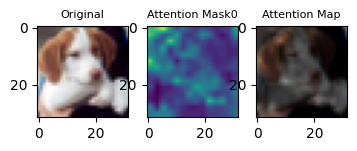

In [ ]:
srg=16
for data in prepared_ds["test"].select([srg]):
    img = data['pixel_values']
    labels = data['labels']
    img = img.resize(1,3,224,224)
    model = model.to('cuda')
    outputs = model(img.to('cuda'), output_attentions=True)
    attention_mask(ds["test"][srg]['img'],outputs)
    predictions = outputs.logits.argmax(dim=1)
    print(predictions.item(), labels)
    srg= srg+1


In [ ]:
import torch.nn.functional as F
model = model.to('cuda')

shape = (12,12,)
a = torch.ones(shape)
mask_initial = torch.FloatTensor(a,)
for i in range(12) :
  for j in range(12) :
    mask_initial[i][j]=0

  print(mask_initial)
  test(model, mask_initial.to('cuda'))

  for j in range(12) :
    mask_initial[i][j]=1



#test(model, mask_initial.to('cuda'))
#  mask_initial[0][i]=1



tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])
Accuracy of the network on the 10000 test images: 96.0 %
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1

		Accuracy of the network on the 10000 test images: 97.07 %
		tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
		        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
		        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
		        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
		        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
		        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
		        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
		        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
		        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
		        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
		        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
		        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [ ]:
shape = (12,12,)
a = torch.ones(shape)
mask_initial = torch.FloatTensor(a,)

for i in range(12) :
  for j in range(12) :
    mask_initial[i][j]=0;
    print(i,j)
    test(model, mask_initial.to('cuda'))
    mask_initial[i][j]=1;

0 0
Accuracy of the network on the 10000 test images: 97.7 %
0 1
Accuracy of the network on the 10000 test images: 97.7 %
0 2
Accuracy of the network on the 10000 test images: 97.8 %
0 3
Accuracy of the network on the 10000 test images: 97.8 %
0 4
Accuracy of the network on the 10000 test images: 95.8 %
0 5
Accuracy of the network on the 10000 test images: 97.89999999999999 %
0 6
Accuracy of the network on the 10000 test images: 97.7 %
0 7
Accuracy of the network on the 10000 test images: 97.7 %
0 8
Accuracy of the network on the 10000 test images: 97.6 %
0 9
Accuracy of the network on the 10000 test images: 97.7 %
0 10
Accuracy of the network on the 10000 test images: 97.7 %
0 11
Accuracy of the network on the 10000 test images: 97.7 %
1 0
Accuracy of the network on the 10000 test images: 97.6 %
1 1
Accuracy of the network on the 10000 test images: 98.0 %
1 2
Accuracy of the network on the 10000 test images: 97.8 %
1 3
Accuracy of the network on the 10000 test images: 97.8999999999999

In [ ]:
metrics = trainer.evaluate(prepared_ds['validation'])
trainer.log_metrics("eval", metrics)
trainer.save_metrics("eval", metrics)

In [ ]:
shape = (12,12,)
a = torch.ones(shape)
mask_initial = torch.FloatTensor(a,)

masking = []
for k in range(10) :

  for i in range(12) :
    for l in masking :
      mask_initial[i][l]=0

  _max=0;
  max_idx=0;
  for i in range(12) :
    if(i in masking) :
      continue
    for j in range(12) :
      mask_initial[j][i]=0
    srg = test(model, mask_initial.to('cuda'))
    if(srg>_max) :
      _max = srg
      max_idx = i

    #print(mask_initial)
    for j in range(12) :
      mask_initial[j][i]=1
  masking.append(max_idx)
  print(max_idx, masking)


Accuracy of the network on the 10000 test images: 97.4 %
Accuracy for class: airplane is 100.0 %
Accuracy for class: automobile is 95.5 %
Accuracy for class: bird  is 94.0 %
Accuracy for class: cat   is 96.1 %
Accuracy for class: deer  is 97.8 %
Accuracy for class: dog   is 94.2 %
Accuracy for class: frog  is 100.0 %
Accuracy for class: horse is 98.0 %
Accuracy for class: ship  is 99.1 %
Accuracy for class: truck is 98.2 %
Accuracy of the network on the 10000 test images: 97.3 %
Accuracy for class: airplane is 99.0 %
Accuracy for class: automobile is 94.4 %
Accuracy for class: bird  is 97.0 %
Accuracy for class: cat   is 96.1 %
Accuracy for class: deer  is 97.8 %
Accuracy for class: dog   is 94.2 %
Accuracy for class: frog  is 99.1 %
Accuracy for class: horse is 99.0 %
Accuracy for class: ship  is 98.1 %
Accuracy for class: truck is 97.2 %
Accuracy of the network on the 10000 test images: 97.5 %
Accuracy for class: airplane is 98.1 %
Accuracy for class: automobile is 97.8 %
Accuracy fo